<a href="https://colab.research.google.com/github/booorayan/unsupervised_in_r/blob/master/UnsuperviseR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

In [3]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [6]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyr")
# install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [16]:
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘igraph’, ‘gridExtra’, ‘networkD3’



## Importing Libraries

In [0]:
library(data.table)
library(dplyr)
library(ggplot2)
library(tidyr)
library(DataExplorer)

## Loading the Dataset

In [9]:
ecommerce <- fread("http://bit.ly/EcommerceCustomersDataset")

# previewing the first five observations in the dataset
head(ecommerce, 5)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20,0.20,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00,0.10,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20,0.20,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE


In [10]:
# getting a glimpse/overview of the data
glimpse(ecommerce)


Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

The dataset has 12,330 observations and 18 features/variables



In [11]:
dim(ecommerce)

[1] 12330    18

In [29]:
summary(ecommerce[, c(1,2,3,4,5,6,7,8,9,10,12,13,14,15)])

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

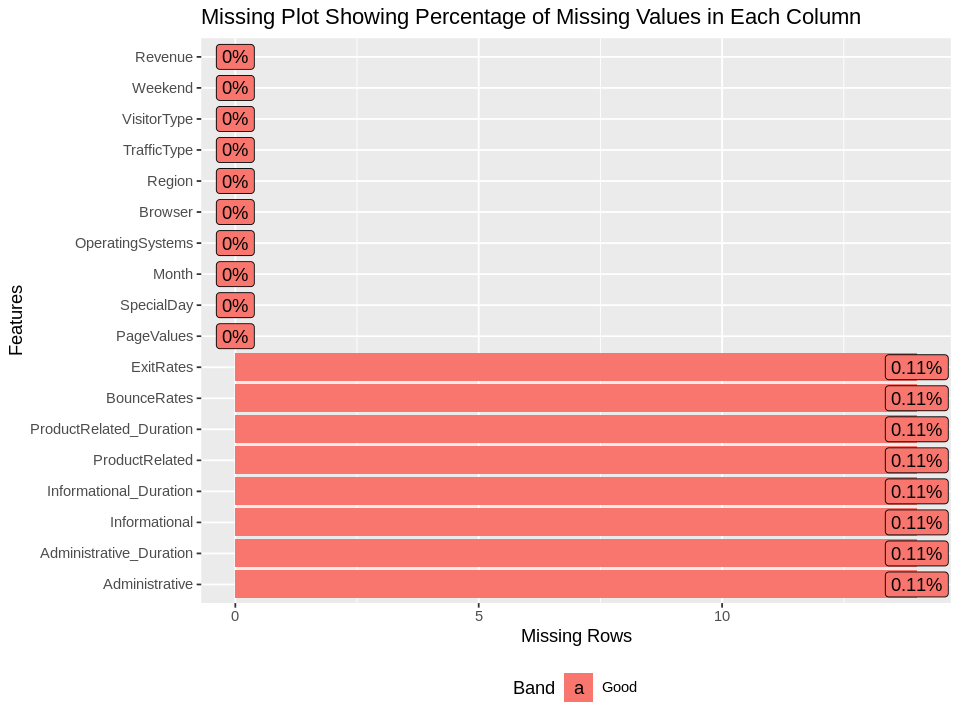

In [26]:
# Using the dataexplorer package to check for missing values in the dataset
options(repr.plot.width=8, repr.plot.height=6)
plot_missing(ecommerce, title="Missing Plot Showing Percentage of Missing Values in Each Column")

Considering the size of the dataset and the plot for missing values, we can remove the missing values and not lose significant information from the dataset

In [22]:
# removing missing data
commerce <- na.omit(ecommerce)

# looking at the dimension of the dataset after removing missing values
dim(commerce)

[1] 12316    18

The resulting dataframe still has over 12,000 observations. 